In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# Reproducibility
random.seed(0)
np.random.seed(0)

In [3]:
# Data
data_df = pd.read_pickle('./Data/Common_data/TCGA_data.pkl')
print(data_df.shape)
data_df.head()

(142, 16778)


,RAB4B,C12orf5,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,ZNF708,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,Group
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-US-A774-01A,1.135915,1.185518,1.508311,0.106218,2.076848,1.696058,1.563285,1.518279,1.326151,0.823396,...,0.291922,1.422110,0.391993,1.259825,1.417075,0.053623,0.262010,1.648482,0.753017,1
TCGA-HZ-A49H-01A,1.263545,1.159384,1.334328,0.041687,2.107688,1.700363,0.762716,1.461860,1.203440,0.747667,...,0.084459,1.303982,0.495630,1.351218,1.014848,0.048091,0.000000,1.571486,0.958453,1
TCGA-FB-A4P5-01A,1.346740,1.218228,1.513779,0.161412,2.078138,1.732962,1.213420,1.561394,1.243956,0.866591,...,0.182331,1.360315,0.412242,1.385681,0.955375,0.133768,0.015626,1.708104,1.034722,1
TCGA-FB-AAPS-01A,1.276416,1.052732,1.425336,0.012543,2.095938,1.731512,1.781024,1.414402,1.106995,0.790620,...,0.085812,1.370744,0.528665,1.271077,1.656302,0.358707,0.000000,1.543691,1.107149,1
TCGA-HV-A5A5-01A,1.262631,1.185857,1.506675,0.199216,2.008856,1.732616,1.392221,1.561279,1.304366,0.799714,...,0.446524,1.343071,0.472570,0.916244,1.209794,0.013931,0.085927,1.598971,0.852705,1


In [4]:
X_train = data_df.loc[:, data_df.columns != 'Group'].values

In [5]:
# Training time!
n_components = 2

pca = decomposition.PCA(n_components=n_components)
pca.fit(X_train)

PCA(n_components=2)

In [6]:
# Mapping
Z_train = pca.transform(X_train)

In [7]:
clusters = GaussianMixture(n_components=2, covariance_type='diag', random_state=0, verbose=1).fit(Z_train)
clus = clusters.predict(Z_train)
data_df['Group'] = clus
data_df.head()

Initialization 0
Initialization converged: True


,RAB4B,C12orf5,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,ZNF708,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,Group
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-US-A774-01A,1.135915,1.185518,1.508311,0.106218,2.076848,1.696058,1.563285,1.518279,1.326151,0.823396,...,0.291922,1.422110,0.391993,1.259825,1.417075,0.053623,0.262010,1.648482,0.753017,1
TCGA-HZ-A49H-01A,1.263545,1.159384,1.334328,0.041687,2.107688,1.700363,0.762716,1.461860,1.203440,0.747667,...,0.084459,1.303982,0.495630,1.351218,1.014848,0.048091,0.000000,1.571486,0.958453,1
TCGA-FB-A4P5-01A,1.346740,1.218228,1.513779,0.161412,2.078138,1.732962,1.213420,1.561394,1.243956,0.866591,...,0.182331,1.360315,0.412242,1.385681,0.955375,0.133768,0.015626,1.708104,1.034722,1
TCGA-FB-AAPS-01A,1.276416,1.052732,1.425336,0.012543,2.095938,1.731512,1.781024,1.414402,1.106995,0.790620,...,0.085812,1.370744,0.528665,1.271077,1.656302,0.358707,0.000000,1.543691,1.107149,1
TCGA-HV-A5A5-01A,1.262631,1.185857,1.506675,0.199216,2.008856,1.732616,1.392221,1.561279,1.304366,0.799714,...,0.446524,1.343071,0.472570,0.916244,1.209794,0.013931,0.085927,1.598971,0.852705,1


In [8]:
import pickle as pkl
with open("./Results/Clustering/Smple_cluster_dict.pkl", "wb") as f:
    samplesdict =dict(zip(data_df.index.str.replace("A$","",regex=True),data_df.Group))
    pkl.dump(samplesdict,f)


In [9]:
df_plot = pd.DataFrame(Z_train,columns=["PC1","PC2"])

df_plot["Group"]= clus

df_plot.head()

,PC1,PC2,Group
0,-4.978431,3.352631,1
1,-10.227231,10.075506,1
2,-12.270842,0.779501,1
3,-8.715532,-0.729420,1
4,-5.878400,6.061821,1


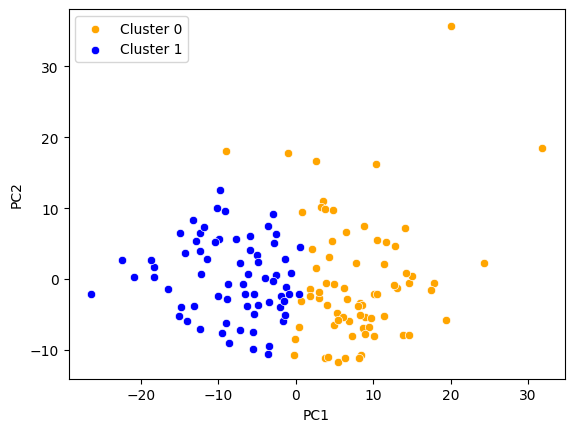

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(df_plot[df_plot["Group"]==0],x="PC1",y="PC2",color="Orange",ax=ax,label="Cluster 0")
sns.scatterplot(df_plot[df_plot["Group"]==1],x="PC1",y="PC2",color="Blue",ax=ax,label="Cluster 1")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [11]:
s_score = silhouette_score(Z_train, clus, metric='euclidean')
s_score

0.38852228183113735

In [12]:
ch_score = calinski_harabasz_score(Z_train, clus)
ch_score

103.55985620848207

In [13]:
db_score = davies_bouldin_score(Z_train, clus)
db_score

0.9958093850372346